In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
df.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [5]:
df.isna().sum().to_frame().T

,row_id,date,country,store,product,num_sold
0,0,0,0,0,0,0


In [6]:
df['country'].value_counts()

Norway     8766
Finland    8766
Sweden     8766
Name: country, dtype: int64

In [7]:
df['store'].value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

In [8]:
df['product'].value_counts()

Kaggle Sticker    8766
Kaggle Mug        8766
Kaggle Hat        8766
Name: product, dtype: int64

In [9]:
df.groupby(['country', 'store'])['product'].value_counts()

country  store       product       
Finland  KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Norway   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Sweden   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Name: product, dtype: int64

In [10]:
df.groupby(['country', 'store', 'product']).num_sold.agg(['min', 'max', 'mean'])

min   max         mean
country store      product                               
Finland KaggleMart Kaggle Hat      210  1113   362.479808
                   Kaggle Mug      126   774   204.200548
                   Kaggle Sticker   70   326   103.044490
        KaggleRama Kaggle Hat      354  1895   628.926762
                   Kaggle Mug      220  1398   356.110883
                   Kaggle Sticker  128   559   180.232033
Norway  KaggleMart Kaggle Hat      335  1809   594.645448
                   Kaggle Mug      201  1113   334.370294
                   Kaggle Sticker  114   518   169.577687
        KaggleRama Kaggle Hat      596  2884  1036.357974
                   Kaggle Mug      366  1935   584.297741
                   Kaggle Sticker  214   874   295.607803
Sweden  KaggleMart Kaggle Hat      248  1207   419.214237
                   Kaggle Mug      149   730   235.885010
                   Kaggle Sticker   86   356   119.613279
        KaggleRama Kaggle Hat      428  2169   731.452430
                   Kaggle Mug      253  1438   411.273101
                   Kaggle Sticker  148   637   208.314853

In [11]:
df.groupby(['country', 'store']).num_sold.agg(['mean'])

mean
country store                 
Finland KaggleMart  223.241615
        KaggleRama  388.423226
Norway  KaggleMart  366.197810
        KaggleRama  638.754506
Sweden  KaggleMart  258.237509
        KaggleRama  450.346794

In [12]:
df.date = pd.to_datetime(df.date)
df.date.min(), df.date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [13]:
import datetime as dt
df['day'] = df['date'].dt.day_name()
day_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df['day'].replace(day_map, inplace=True)

<AxesSubplot:title={'center':'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

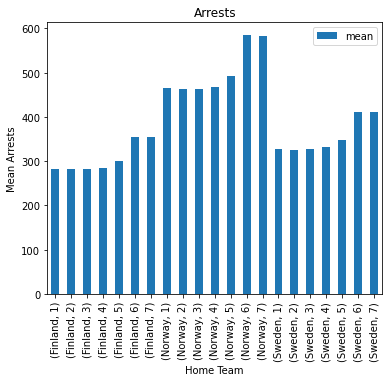

In [14]:
#Weekend has more Sales Friday has Little More
dfg = df.groupby(['country', 'day']).num_sold.agg(['mean'])
dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(6, 5))

<AxesSubplot:title={'center':'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

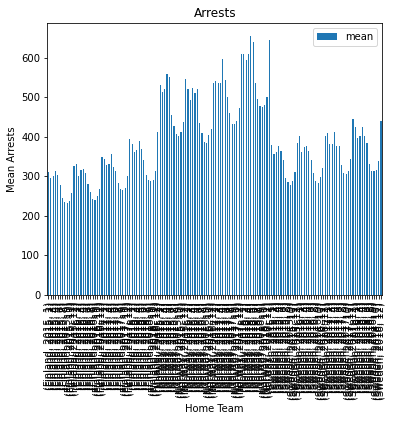

In [15]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

month_map = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
df['month'].replace(month_map, inplace=True)

dfg = df.groupby(['country', 'year', 'month']).num_sold.agg(['mean'])

dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(6, 5))

In [16]:
df.groupby(['country', 'year', 'month']).num_sold.agg(['median'])

median
country year month        
Finland 2015 1       295.5
             2       271.5
             3       261.0
             4       252.0
             5       232.0
...                    ...
Sweden  2018 8       281.0
             9       287.0
             10      289.5
             11      321.5
             12      360.5

[144 rows x 1 columns]

In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [18]:
test.date = pd.to_datetime(test.date)
test.date.min(), test.date.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [54]:
!nvidia-smi

Sun Jan 23 18:15:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 496.49       Driver Version: 496.49       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |    105MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
df.head()

,row_id,date,country,store,product,num_sold,day,month,year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,4,1,2015
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,4,1,2015
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,4,1,2015
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,4,1,2015
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,4,1,2015


In [24]:
import numpy as np

group_cols = ('country', 'store', 'product')

df['price_change_perc'] = (
    df['num_sold'] / df.groupby(list(group_cols))['num_sold'].shift() - 1
).replace([np.inf, -np.inf, np.nan], 0.).astype(np.float32)

df['price_change_logdiff'] = np.log(
        df['num_sold'] / df.groupby(list(group_cols))['num_sold'].shift()
    ).replace([np.inf, -np.inf, np.nan], 0.).astype(np.float32)

In [25]:
df.to_csv('Change.csv', index=False)

In [26]:
df['weekday'] = df['date'].dt.weekday.astype(np.int8)

In [27]:
df.head(10)

,row_id,date,country,store,product,num_sold,day,month,year,price_change_perc,price_change_logdiff,weekday
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,4,1,2015,0.0,0.0,3
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,4,1,2015,0.0,0.0,3
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,4,1,2015,0.0,0.0,3
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,4,1,2015,0.0,0.0,3
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,4,1,2015,0.0,0.0,3
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283,4,1,2015,0.0,0.0,3
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526,4,1,2015,0.0,0.0,3
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906,4,1,2015,0.0,0.0,3
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250,4,1,2015,0.0,0.0,3
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005,4,1,2015,0.0,0.0,3


In [29]:
df['date'].dt.year.astype(np.int)

<ipython-input-29-a21165ce6d52>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['date'].dt.year.astype(np.int)


0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
26293    2018
26294    2018
26295    2018
26296    2018
26297    2018
Name: date, Length: 26298, dtype: int32

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
preds = pd.read_csv('Result.csv')

test['num_sold'] = preds['num_sold']

In [5]:
test

,row_id,date,country,store,product,num_sold
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,343.294427
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,470.771480
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,146.310362
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,558.122544
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,836.480097
...,...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat,549.571709
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker,209.062047
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug,662.553455
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat,970.526528


In [7]:
df = train.append(test)

In [9]:


train_monthly = train.set_index('date').groupby([pd.Grouper(freq = 'M')])[['num_sold']].mean()

plt.figure(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'num_sold', data = train, label = 'daily')
sns.lineplot(x = 'date', y = 'num_sold', data = train_monthly, label = 'monthly mean', color = 'black')
plt.title('Monthly Trend')
plt.grid(alpha = 0.5)
plt.show()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [10]:
df.date = pd.to_datetime(df.date)

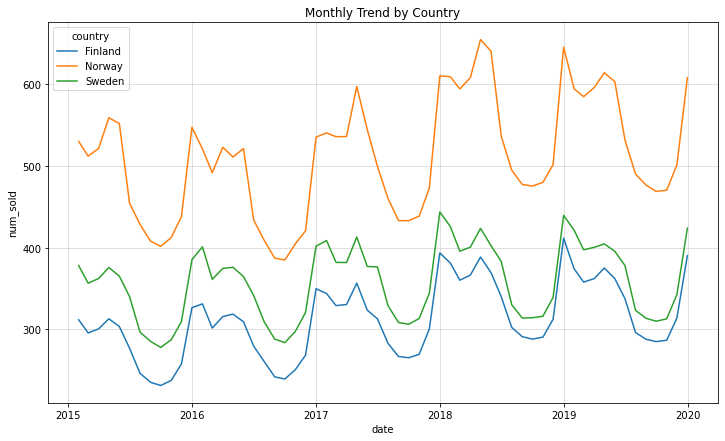

In [11]:
#Visualisation of the Prediction

train_monthly_country = df.set_index('date').groupby([pd.Grouper(freq = 'M'), 'country'])[['num_sold']].mean()

plt.figure(figsize = (12, 7))
sns.lineplot(x = 'date', y = 'num_sold', hue = 'country', data = train_monthly_country)
plt.title('Monthly Trend by Country')
plt.grid(alpha = 0.5)
plt.show()